# Exploratory Data Analysis

In this notebook, I looked through the dataset from Rent the Runway. I started out looking at the amount of nulls I had in the dataset, and then exploring different scatterplots to see what the average consumer of Rent the Runway looked like. 

I found that there was a column in which people left reviews of their purchase, so I did sentiment analysis on this data just to see if the ratings overall matched with the sentiment of the reviews. I wanted to better understand how the customer felt in order to make sure that I could give recommendation off of this dataset.

In [1]:
#Set up my import for exploring the data here.
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Read in the data.
df = pd.read_json('renttherunway_final_data.json', lines = True)

In [3]:
#Looked at the amount of missing data I had in each column.
df.isnull().sum()

fit                   0
user_id               0
bust size         18411
item_id               0
weight            29982
rating               82
rented for           10
review_text           0
body type         14637
review_summary        0
category              0
height              677
size                  0
age                 960
review_date           0
dtype: int64

In [4]:
df.head(3)

,fit,user_id,bust size,item_id,weight,rating,rented for,review_text,body type,review_summary,category,height,size,age,review_date
0,fit,420272,34d,2260466,137lbs,10.0,vacation,An adorable romper! Belt and zipper were a lit...,hourglass,So many compliments!,romper,"5' 8""",14,28.0,"April 20, 2016"
1,fit,273551,34b,153475,132lbs,10.0,other,I rented this dress for a photo shoot. The the...,straight & narrow,I felt so glamourous!!!,gown,"5' 6""",12,36.0,"June 18, 2013"
2,fit,360448,NaN,1063761,NaN,10.0,party,This hugged in all the right places! It was a ...,NaN,It was a great time to celebrate the (almost) ...,sheath,"5' 4""",4,116.0,"December 14, 2015"


Text(0, 0.5, 'Age')

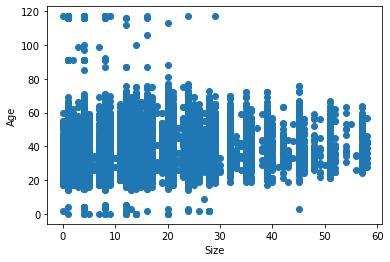

In [43]:
#Created a scatter plot of someones size and age to get an understanding of the demographic of the Rent the Runway
#consumer. Noticed that some of the ages did not seem to make sense. The fact that there are consumers that are over
#100
plt.scatter(df['size'], df['age'])
plt.xlabel('Size')
plt.ylabel('Age')

### Visualizations

Below are links to Tableau, where I made different graphs to get further insight into the demographics of the consumers and what their take is on the clothes they rented from Rent the Runway.

[Avg Age of Customer Renting per Event](https://public.tableau.com/profile/raven.hinson#!/vizhome/RTRRecommenderVisualizations/Sheet1)

[Avg Rating per Product](https://public.tableau.com/profile/raven.hinson#!/vizhome/RTRRecommenderVisualizations/Sheet2)

[Avg Rating of Product per Event Type](https://public.tableau.com/profile/raven.hinson#!/vizhome/RTRRecommenderVisualizations/Sheet3)

[Amount of People per Age Group who Rented for Certain Events](https://public.tableau.com/profile/raven.hinson#!/vizhome/RTRRecommenderVisualizations/Sheet4)

[Amount of People per Body Type who Rented for Certain Events](https://public.tableau.com/profile/raven.hinson#!/vizhome/RTRRecommenderVisualizations/Sheet5)

Each of this visualizations gave different insights into what the customers thought of the clothing and who was wearing what when.

I mostly found that overall people gave high ratings of the clothing they were renting. People mostly rent for weddings or formal affairs no matter what your body type is, but most customers have an hour-glass body type and are between the ages of 25-45.

### Sentiment Analysis

I perfomed sentiment analysis on the reviews that the customers gave the clothing they rented. After running the analysis I looked to see if different groups of people would have different opinions about the clothes they were renting. I look at the 'fit' column to see if people would have negative things to share based on whether something fit them or not, but I did not find this to be the case. I also thought that looking at the sentiment of the reviews based on someones body type would be insightful, but overall people with different body type felt the same. It was not until I looked at the categories of the clothing where I saw more or less negative reviews.

In [16]:
#Import Sentiment Analyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [17]:
#Created a dataframe of the sentiments of the 'review text' column
scores_list = []

for each in df['review_text']:
    sia = SentimentIntensityAnalyzer()
    scores = sia.polarity_scores(each)
    scores_list.append(scores)

scores_df = pd.DataFrame(scores_list)

In [18]:
scores_df.head(3)

,neg,neu,pos,compound
0,0.023,0.648,0.330,0.9453
1,0.048,0.683,0.268,0.8991
2,0.037,0.727,0.236,0.9559


In [19]:
#I add the fit column to the data frame.
scores_df['fit'] = df['fit']

In [20]:
scores_df.head(3)

,neg,neu,pos,compound,fit
0,0.023,0.648,0.330,0.9453,fit
1,0.048,0.683,0.268,0.8991,fit
2,0.037,0.727,0.236,0.9559,NaN


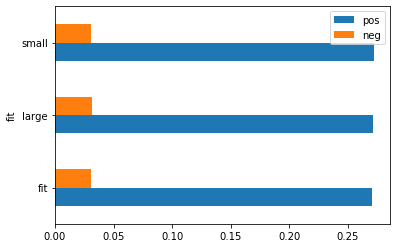

In [21]:
#Created a bar graph to analysis the sentiment based on whether a product fit the customer or not.
scores_df.groupby('fit').mean()[['pos', 'neg']].plot(kind='barh')

In [22]:
df['body type'].value_counts()

hourglass            46221
athletic             39305
petite               20361
pear                 18816
straight & narrow    13535
full bust            11653
apple                 3996
Name: body type, dtype: int64

In [23]:
#I add the body type column to the data frame.
scores_df['body_type'] = df['body type']

In [24]:
scores_df.isnull().sum()

neg              0
neu              0
pos              0
compound         0
fit          25283
body_type    32559
dtype: int64

In [25]:
#Drop the null values of body type since they would not be as informative.
scores_df.dropna(inplace = True)

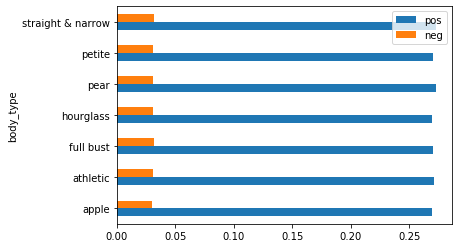

In [26]:
#Created a bar graph of the sentiment of the review text based on the customers body type.
scores_df.groupby('body_type').mean()[['pos', 'neg']].plot(kind='barh')

In [27]:
df['category'].value_counts()

dress           78345
gown            37069
sheath          16393
jumpsuit         4451
shift            4445
                ...  
sweatershirt        4
sweatpants          1
overcoat            1
crewneck            1
buttondown          1
Name: category, Length: 68, dtype: int64

In [28]:
#Added the category column to the sentiment dataframe.
scores_df['category'] = df['category']

In [29]:
scores_df.isnull().sum()

neg          0
neu          0
pos          0
compound     0
fit          0
body_type    0
category     0
dtype: int64

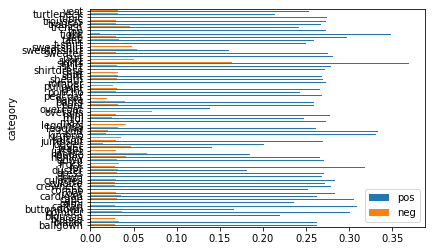

In [42]:
#Created a bar graph of the sentiment of the review text based on the category of clothing. It is a bit difficult to 
#read but overall we can see that some clothes had more negative feddback than others.
scores_df.groupby('category').mean()[['pos', 'neg']].plot(kind='barh')